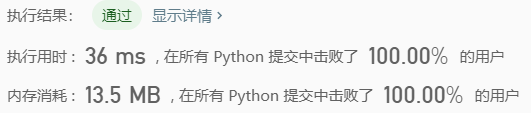
# 思路
二分递归查找。记要查找的下标范围为[l, r]
* 终止条件1：左端值等于目标值，返回（有端值等于目标值时不可返回，因为当数组中还有别的目标值时，这种方法返回的下标不是最小的）
* 终止条件2：l和r相邻且都不等于目标值
* 终止条件3：数组左端和有端值都大于目标值target，则数组中不存在target
递归过程中，从数组中间二分，有两种情况：

* 第一种：当array[l]，array[m]和array[r]单调时，target只存在于数组的一边：
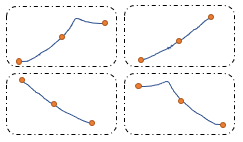
* 第二种：除第一种情况外，其余情况下数组两边都有可能出现target，所以两边都找，然后返回最小的下标。
# 代码

In [8]:
# """
# This is MountainArray's API interface.
# You should not implement it, or speculate about its implementation
# """
class MountainArray():
    def __init__(self, array):
        self.array = array
    def get(self, index):
        """
        :type index: int
        :rtype int
        """
        return self.array[index]

    def length(self):
        """
        :rtype int
        """
        return len(self.array)

In [42]:
class Solution(object):
    def findInMountainArray(self, target, mountain_arr):
        """
        :type target: integer
        :type mountain_arr: MountainArray
        :rtype: integer
        """
        # 在mountain_arr[l, r]中找target
        n = mountain_arr.length()
        l, r = 0, n-1
        return self.subfindMA(target, mountain_arr, l, r)
    
    def subfindMA(self, target, mountain_arr, l, r):
        nl, nr = mountain_arr.get(l), mountain_arr.get(r)
        if nl == target:
            return l
        
        # 终止条件1：如果l和r相邻，它俩中有target就返回索引，否则返回-1
        if l >= r-1:
            if nr == target:
                return r
            return -1
        # 终止条件2：如果target比两端值都小，说明不存在
        if target < nl and target < nr:
            return -1
        
        # 二分递归找，2种情况
        m = (l+r+1) // 2
        nm = mountain_arr.get(m)
        # 第1种
        if nl < nm <= nr:
            return self.subfindMA(target, mountain_arr, l+1, m) if target < nm \
                                    else self.subfindMA(target, mountain_arr, m, r)
        if nl >= nm > nr:
            return self.subfindMA(target, mountain_arr, m, r) if target < nm \
                                    else self.subfindMA(target, mountain_arr, l+1, m)
        # 第2种
        res1 = self.subfindMA(target, mountain_arr, l+1, m)
        res2 = self.subfindMA(target, mountain_arr, m, r)
        lis = []
        if res1 >= 0:
            lis.append(res1)
        if res2 >= 0:
            lis.append(res2)
        print(lis)
        return -1 if lis == [] else min(lis)

In [43]:
array = [1,5,2]
target = 2
arr = MountainArray(array)
Solution().findInMountainArray(target, arr)

[2]


2